In [26]:
import pandas as pd
import csv
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import butter, lfilter
from scipy.signal import freqs
from scipy.signal import savgol_filter

In [3]:
#Compilation of function for signal filtering
 
import numpy as np
import cv2
from scipy.signal import butter, lfilter, filtfilt
import matplotlib.pyplot as plt
 
#filter function
 
#low pass filter
def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low')
    return b, a
 
def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    #y = lfilter(b, a, data)
    y = filtfilt(b, a, data)
    return y

#band pass filter with lfiter
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a
 
#band pass filter with filtfilt
def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    # y = lfilter(b, a, data)
    y =filtfilt(b, a, data)
    return y
 
def butter_bandpass_filter2(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    # y =filtfilt(b, a, data)
    return y
 
#high pass filter
def butter_highpass(cutoff,fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b,a = butter(order,normal_cutoff, btype='high', analog=False)
    return b, a
 
def butter_highpass_filter(data, cutoff, fs, order):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b,a,data)
    return y

### Reading Signal from XLS

In [28]:
# Load all dataset from Pyhphox application
#df = pd.read_excel('gait.xlsx')
df = pd.read_excel('Data_IMU.xls')


In [30]:
# chek the header and tail
df.head()
#df.head()

,Time (s),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,0.063722,-0.008525,-0.008525,0.150249,0.002964,-0.003339,-0.151728
1,0.073976,-0.008525,-0.007459,0.140659,0.002885,-0.003242,-0.146657
2,0.084230,-0.007459,-0.007459,0.131068,0.002863,-0.003269,-0.146646
3,0.094483,-0.006394,-0.006394,0.119347,0.003004,-0.003420,-0.156106
4,0.104737,-0.004262,-0.005328,0.108691,0.003085,-0.003506,-0.162693


In [32]:
# Parameter for plotting dataset
#fs = 100 # frekuensi sampling from your sensor
time=df.iloc[: , 0]
gx=df.iloc[: , 4]
gy=df.iloc[: ,5]
gz=df.iloc[: , 6]
acc_x = df.iloc[: ,1]
acc_y = df.iloc[: , 2]
acc_z=df.iloc[: , 3]

st=time[2]-time[1]
sr=1/round(st,2)
# change to linear acc (in case you use the accelerometer, not linear accelerometer)
#acc_z=(acc_z*9.81)-9.81 

### FFT Part

In [35]:
time=df.iloc[: , 0]
gx=df.iloc[: , 1]
gy=df.iloc[: ,2]
gz=df.iloc[: , 3]
acc_x = df.iloc[: ,4]
acc_y = df.iloc[: , 5]
acc_z=df.iloc[: , 6]

st=time[2]-time[1]
sr=1/round(st,2)

print('Freq. Sampling:',sr ,' Hz')

Freq. Sampling: 100.0  Hz


In [45]:
# Filter requirements.
order = 4     # Orde Filter
fs = 100     # sample rate, Hz
cutoff = 0.5  # desired cutoff frequency of the filter, Hz

f_acc_x=butter_lowpass_filter(acc_x, cutoff, fs, order)
f_acc_y=butter_lowpass_filter(acc_y, cutoff, fs, order)
f_acc_z=butter_lowpass_filter(acc_z, cutoff, fs, order)
f_gyr_x=butter_highpass_filter(gx, cutoff, fs, order)
f_gyr_y=butter_highpass_filter(gy, cutoff, fs, order)
f_gyr_z=butter_highpass_filter(gz, cutoff, fs, order)


### Plot Accelerometer Data

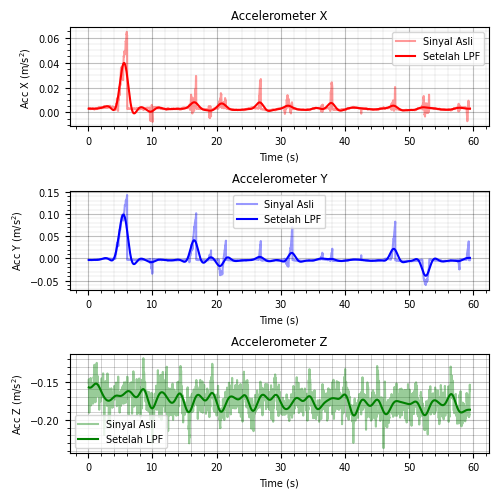

In [48]:

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(5)
plt.rcParams.update({'font.size': 7})

plt.subplot(3,1,1)
plt.plot(time,acc_x,'r',label='Sinyal Asli',alpha=0.4)
plt.plot(time,f_acc_x,'r',label='Setelah LPF')
plt.xlabel('Time (s)')
plt.ylabel('Acc X (m/s$^2$)')
plt.legend()
plt.gca().set_title('Accelerometer X')
plt.grid(which='major', color='black', linewidth=0.8,alpha=0.25)
plt.grid(which='minor', color='black', linestyle='-', linewidth=0.2,alpha=0.25)
plt.minorticks_on()

plt.subplot(3,1,2)
plt.plot(time,acc_y,'b',label='Sinyal Asli',alpha=0.4)
plt.plot(time,f_acc_y,'b',label='Setelah LPF')
plt.xlabel('Time (s)')
plt.ylabel('Acc Y (m/s$^2$)')
plt.legend()
plt.gca().set_title('Accelerometer Y')
plt.grid(which='major', color='black', linewidth=0.8,alpha=0.25)
plt.grid(which='minor', color='black', linestyle='-', linewidth=0.2,alpha=0.25)
plt.minorticks_on()

plt.subplot(3,1,3)
plt.plot(time,acc_z,'g',label='Sinyal Asli',alpha=0.4)
plt.plot(time,f_acc_z,'g',label='Setelah LPF')
plt.xlabel('Time (s)')
plt.ylabel('Acc Z (m/s$^2$)')
plt.legend()
plt.gca().set_title('Accelerometer Z')
plt.grid(which='major', color='black', linewidth=0.8,alpha=0.25)
plt.grid(which='minor', color='black', linestyle='-', linewidth=0.5,alpha=0.25)
plt.minorticks_on()

plt.tight_layout()

### Plot Gyroscope Data

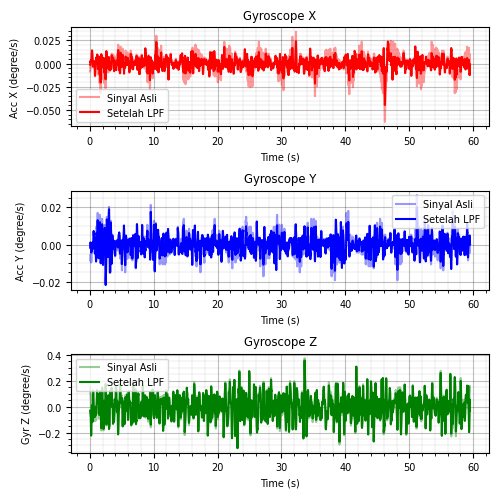

In [51]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(5)
plt.rcParams.update({'font.size': 7})

plt.subplot(3,1,1)
plt.plot(time,gx,'r',label='Sinyal Asli',alpha=0.4)
plt.plot(time,f_gyr_x,'r',label='Setelah LPF')
plt.xlabel('Time (s)')
plt.ylabel('Acc X (degree/s)')
plt.legend()
plt.gca().set_title('Gyroscope X')
plt.grid(which='major', color='black', linewidth=0.8,alpha=0.25)
plt.grid(which='minor', color='black', linestyle='-', linewidth=0.2,alpha=0.25)
plt.minorticks_on()

plt.subplot(3,1,2)
plt.plot(time,gy,'b',label='Sinyal Asli',alpha=0.4)
plt.plot(time,f_gyr_y,'b',label='Setelah LPF')
plt.xlabel('Time (s)')
plt.ylabel('Acc Y (degree/s)')
plt.legend()
plt.gca().set_title('Gyroscope Y')
plt.grid(which='major', color='black', linewidth=0.8,alpha=0.25)
plt.grid(which='minor', color='black', linestyle='-', linewidth=0.2,alpha=0.25)
plt.minorticks_on()

plt.subplot(3,1,3)
plt.plot(time,gz,'g',label='Sinyal Asli',alpha=0.4)
plt.plot(time,f_gyr_z,'g',label='Setelah LPF')
plt.xlabel('Time (s)')
plt.ylabel('Gyr Z (degree/s)')
plt.legend()
plt.gca().set_title('Gyroscope Z')
plt.grid(which='major', color='black', linewidth=0.8,alpha=0.25)
plt.grid(which='minor', color='black', linestyle='-', linewidth=0.2,alpha=0.25)
plt.minorticks_on()

plt.tight_layout()